In [8]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
from sklearn.impute import KNNImputer

In [12]:
import numpy as np

In [13]:
from plotly.subplots import make_subplots

In [14]:
df = pd.read_csv('stud_math.csv')

In [15]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [16]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [17]:
# Посмотрим, насколько хорошо собраны данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [18]:
# Посмотрим, как много данных не хватает

df.isna().sum().sort_values()

school                  0
sex                     0
age                     0
Medu                    3
score                   6
studytime, granular     7
studytime               7
goout                   8
schoolsup               9
freetime               11
absences               12
activities             14
health                 15
nursery                16
address                17
reason                 17
Mjob                   19
higher                 20
failures               22
Fedu                   24
famrel                 27
famsize                27
traveltime             28
guardian               31
romantic               31
internet               34
Fjob                   36
famsup                 39
paid                   40
Pstatus                45
dtype: int64

In [19]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
Medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
Fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
"studytime, granular",0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [20]:
df.dropna()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,...,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
14,GP,M,15,U,GT3,A,2.0,2.0,other,other,...,-9.0,yes,yes,yes,4.0,5.0,2.0,3.0,0.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,18,R,GT3,T,2.0,1.0,other,other,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,5.0,35.0
386,MS,F,18,R,GT3,T,4.0,4.0,teacher,at_home,...,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
387,MS,F,19,R,GT3,T,2.0,3.0,services,other,...,-9.0,yes,yes,no,5.0,4.0,2.0,5.0,0.0,0.0
388,MS,F,18,U,LE3,T,3.0,1.0,teacher,services,...,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0


In [21]:
df.score.values

array([ 30.,  30.,  50.,  75.,  50.,  75.,  55.,  30.,  95.,  75.,  45.,
        60.,  70.,  55.,  80.,  70.,  70.,  50.,  25.,  50.,  75.,  75.,
        80.,  60.,  40.,  40.,  55.,  75.,  55.,  55.,  60.,  85.,  80.,
        60.,  75.,  30.,  90.,  75.,  55.,  65.,  55.,  60.,  90.,  55.,
        45.,  30.,  55., 100.,  70.,  35.,  65.,  65.,  50.,  55.,  65.,
        50.,  75.,  75.,  45.,  80.,  55.,  55.,  45.,  45.,  50.,  75.,
        60.,  30.,  40.,  80.,  75.,  50.,  25.,  70.,  55.,  50.,  50.,
        55.,  50.,  25.,  60.,  55.,  30.,  75.,  50.,  40.,  30.,  70.,
        50.,  35.,  40.,  90.,  30.,  50.,  70.,  50.,  75.,  50.,  70.,
        40.,  25.,  85.,  70.,  30.,  90.,  55.,  40.,  90.,  65.,  80.,
        95.,  50.,  65.,  95.,  45.,  80.,  70.,  65.,  40.,  65.,  75.,
        75.,  65.,  65.,  40.,  60.,  55.,  45.,   0.,  90.,   0.,   0.,
        60.,  55.,   0.,   0.,   0.,   0.,  60.,  75.,   0.,  45.,  55.,
        65.,   0.,  55.,   0.,  55.,   0.,  50.,   

Мы видим,что в итоге останется 97 столбцов, и предсказательная сила модели явно упадёт.
Для начала заменим все буквенные переменные на числовые.


Напишем программу, которая создаст список, сопоставляющий цифровые значения и их буквенные коды.
Существует метод get_dummies(), который в данном случае нельзя применить так как если у нас,
например, появится два столбца для переменной school, метод К-ближайших соседей сможет заполнить
два столбца значением, что будет некорректно, так как наши буквенные переменные могут иметь 
только одно значение, и оно исключает все остальные.


Определим все необходимые функции:
    

In [24]:
def drop_outliers(df):
    '''
    Функция, которая находит выбросы в данных, а затем представляет их для анализа
    '''

    # Создадим список индексов с данными выбросов
    df_outliers = []

    # Создадим список столбцов, который потом передадим для дальнейшего анализа
    outliers_list = []
    # Итерация по всем столбцам датасета
    for element in df.dtypes.index:

        # Устраняем выбросы во всех числовых столбцах
        if df[element].dtype != 'object':

            # Найдём медиану и межквартильное расстояние
            median = df[element].median()
            IQR = df[element].quantile(0.75) - df[element].quantile(0.25)
            low = df[element].quantile(0.25) - 1.5*IQR
            high = df[element].quantile(0.75) + 1.5*IQR
            outliers = df[element].loc[(df[element] < low) | (
                df[element] > high)].size

            if outliers > 0:
                outliers_list.append(element)
                print(element, ': ', median, IQR, low,
                      high, 'number of outliers:', outliers)

                # Добавим очередной столбец с выбросами в наш список
                df_outliers.append(
                    [element, df.loc[(df[element] < low) | (df[element] > high)].index])

                # Нарисуем график, на котором будет наглядно представлены выбросы
                figure, ax = plt.subplots()
                ax.set_xlabel('index')
                ax.set_ylabel('values')
                ax.set_title(element)
                ax.plot(df.index, df[element],
                        data=df[element], ls='', marker='.')
                ax.plot(
                    df[element].loc[(df[element] < low) |
                                    (df[element] > high)].index,
                    df[element].loc[(df[element] < low) |
                                    (df[element] > high)],
                    data=df[element].loc[(df[element] < low)
                                         | (df[element] > high)],
                    color='r',
                    ls='',
                    marker='.'
                )
    print(outliers_list)
    return df_outliers

In [25]:
def number_encode(df):
    """
        Функция для замены текстовых значений числовыми.
        Создаётся массив, в котором текстовые значения перечислены по порядку,
        и вместо этих значений в датасет попадают порядковые номера значений в этом списке.
    """

    # создаём пустой массив категорий
    dataset_categories = [{}]

    # итерация по всем столбцам датасета
    for element in df.dtypes.index:
        if df[element].dtype == 'object':

            # создаём значение с имеющимися категориями в очередном столбце нашего датасета
            new_object = {str(element): df[element].astype(
                'category').cat.categories}
            dataset_categories.append(new_object)

        # заменяем буквенные переменные на числовые:
            df[element] = df[element].astype('category').cat.codes

    print('Done!')
    return dataset_categories

In [26]:
df.score.size

395

Создадим фунцию, которая создаст дополнительный столбец в котором будет указано, дополнялись
ли отсутствующие данные или нет чтобы учесть это во время обучения модели, которая будет
предсказывать score.

Из всех переменных, с которыми мы работаем, только возраст 'age' и количество пропущенных занятий 
'absences' являются числовыми переменными, которые могут быть распределены нормально. 
Остальные переменные с помощью букв или цифр кодируют какое-то конкретное значение.
Проще говоря, остальные переменные категориальные, поэтому выбросы целесообразно рассматривать
nолько в цифровых переменных.

In [80]:
#Устраним выбросы в числовых переменных


age :  17.0 2.0 13.0 21.0 number of outliers: 1
Fedu :  2.0 1.0 0.5 4.5 number of outliers: 3
traveltime :  1.0 1.0 -0.5 3.5 number of outliers: 7
studytime :  2.0 1.0 -0.5 3.5 number of outliers: 27
failures :  0.0 0.0 0.0 0.0 number of outliers: 80
studytime, granular :  -6.0 3.0 -10.5 1.5 number of outliers: 27
famrel :  4.0 1.0 2.5 6.5 number of outliers: 25
freetime :  3.0 1.0 1.5 5.5 number of outliers: 18
absences :  4.0 8.0 -12.0 20.0 number of outliers: 17
['age', 'Fedu', 'traveltime', 'studytime', 'failures', 'studytime, granular', 'famrel', 'freetime', 'absences']


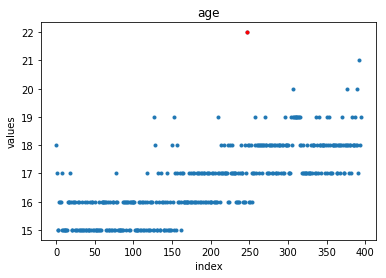

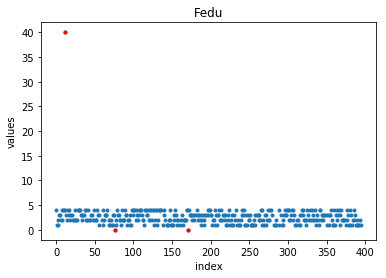

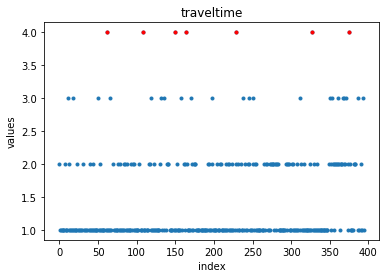

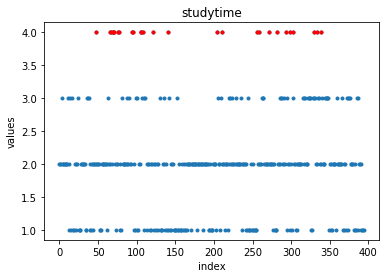

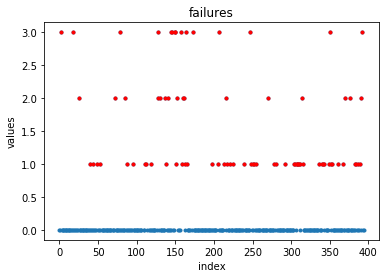

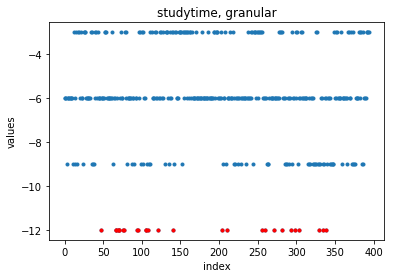

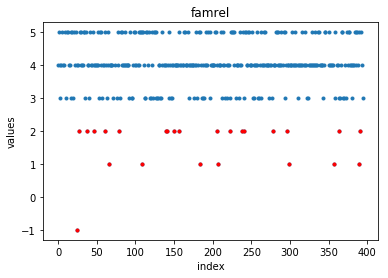

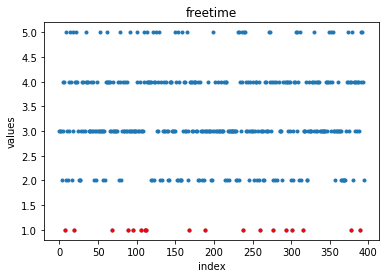

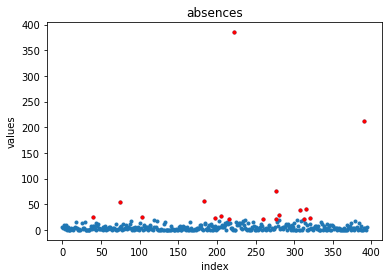

In [27]:
outliers = drop_outliers(df)

Рассмотрим внимательнее каждую переменную, которую нам выделила написанная функция.
1)В переменной age все значения укладываются в множество допустимых значений, которое указано
в начале задания. Но 22 является довольно сильным выбросом, так что уберём это значение из датасета.
2)Переменная Fedu имеет значение, которое явно является опечаткой, и его можно заменить на 4. Другие два значения тоже укладываются во множество допустимых значений, поэтому их лучше оставить.
3)Значение 4 в переменной traveltime является допустимым и не может быть убрано; то же самое касается значений выбросов во всех следующих переменных: studytime, failures, всех кроме одного значений выбросов в famrel, freetime.
4)Уберём -1 в переменной famrel.
5)Переменная studytime,granular не описана в начале задания, и что она значит, мы не можем представить. Оставим её до корелляционного анализа в датасете, возможно она несёт какой-то смысл.
6)Переменная absences имеет 17 выбросов, но глядя на график кажется, что особенно выбиваются два значения, а остальные в принципе можно оставить, ведь они тоже несут нам информацию. Рассмотрим эти значения подробнее.

In [28]:
# 1
df.drop(outliers[0][1], inplace=True)

In [29]:
# 2
df.Fedu.iloc[outliers[1][1][1]] = 4

/home/quasar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
# 4
df.drop(df[df.famrel == -1].index, inplace=True)

In [31]:
# 5 Рассмотрим подробнее два наибольших значения:
df.absences.sort_values(ascending=False)

222    385.0
390    212.0
276     75.0
183     56.0
74      54.0
       ...  
227      NaN
254      NaN
265      NaN
270      NaN
352      NaN
Name: absences, Length: 393, dtype: float64

In [32]:
# 5
df[df.absences == 385]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,...,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0


С точки зрения здравого смысла может показаться странным, что ученик с 385 пропусками имеет 85 баллов
по экзамену, с другой стороны, например, глядя на работу его отца можно предположить, что он мог заниматься
со своим ребёнком и помочь ему сдать экзамены несмотря на пропуски. Наверняка не получится узнать, в чём
причина такого большого количества пропусков, и скорее всего это может быть исключение из правил. Но для целей
статистики и точности нашей модели уберём это значение из датасета.


In [33]:
# 5
df.drop(df[df.absences == 385].index, inplace=True)

In [34]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [35]:
# 5 Уберём значение 212, так как оно тоже сильно портит статистику
df.drop(df[df.absences == 212].index, inplace=True)

In [36]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,...,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [37]:
# Заполним все пропуски значением -1, так как во время заполнения пропусков будет
# удобнее сравнивать пропущенные значения с точным значением
df.fillna(-1, inplace=True)

In [38]:
# заполним единственный оставшийся столбец значением -1, чтобы привести все пропуски к единому виду
df['studytime, granular'] = df['studytime, granular'].fillna(-1)

In [39]:
# Перекодируем номинативные переменные в числовые для того, чтобы будущая
# модель машинного обучения смогла с ними работать, и сохраним значения в массив
categories = number_encode(df)

Done!


In [40]:
categories

[{},
 {'school': Index(['GP', 'MS'], dtype='object')},
 {'sex': Index(['F', 'M'], dtype='object')},
 {'address': Index([-1, 'R', 'U'], dtype='object')},
 {'famsize': Index([-1, 'GT3', 'LE3'], dtype='object')},
 {'Pstatus': Index([-1, 'A', 'T'], dtype='object')},
 {'Mjob': Index([-1, 'at_home', 'health', 'other', 'services', 'teacher'], dtype='object')},
 {'Fjob': Index([-1, 'at_home', 'health', 'other', 'services', 'teacher'], dtype='object')},
 {'reason': Index([-1, 'course', 'home', 'other', 'reputation'], dtype='object')},
 {'guardian': Index([-1, 'father', 'mother', 'other'], dtype='object')},
 {'schoolsup': Index([-1, 'no', 'yes'], dtype='object')},
 {'famsup': Index([-1, 'no', 'yes'], dtype='object')},
 {'paid': Index([-1, 'no', 'yes'], dtype='object')},
 {'activities': Index([-1, 'no', 'yes'], dtype='object')},
 {'nursery': Index([-1, 'no', 'yes'], dtype='object')},
 {'higher': Index([-1, 'no', 'yes'], dtype='object')},
 {'internet': Index([-1, 'no', 'yes'], dtype='object')},
 {

In [41]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,0,0,18,2,0,1,4.0,4.0,1,5,...,-6.0,2,0,1,4.0,3.0,4.0,3.0,6.0,30.0
1,0,0,17,2,1,0,1.0,1.0,1,3,...,-6.0,2,2,1,5.0,3.0,3.0,3.0,4.0,30.0
2,0,0,15,2,2,2,1.0,1.0,1,3,...,-6.0,2,2,0,4.0,3.0,2.0,3.0,10.0,50.0
3,0,0,15,2,1,2,4.0,2.0,2,0,...,-9.0,2,2,2,3.0,2.0,2.0,5.0,2.0,75.0
4,0,0,16,2,1,2,3.0,3.0,3,3,...,-6.0,2,1,1,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1,0,18,2,1,2,1.0,1.0,3,3,...,-6.0,2,0,1,1.0,1.0,1.0,5.0,0.0,0.0
391,1,1,17,2,2,2,3.0,1.0,4,4,...,-3.0,2,2,1,2.0,4.0,5.0,2.0,3.0,80.0
392,1,1,21,1,1,2,1.0,1.0,3,3,...,-3.0,0,1,1,5.0,5.0,3.0,3.0,3.0,35.0
393,1,1,18,1,2,2,3.0,2.0,4,3,...,-3.0,2,2,1,4.0,4.0,1.0,5.0,0.0,50.0


In [42]:
# Создадим столбец, в котором будет указано, есть ли в данной строчке пропуски данных.
index_list = []
for row in df:
    index_list.append(df[df[row] == -1].index.tolist())

In [43]:
# Заполним стоблец нулями, а затем единицами там, где есть значение value
df['hasnans'] = 0
for element in index_list:
    for value in element:
        df['hasnans'][value] = 1

/home/quasar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
df.hasnans

0      0
1      0
2      0
3      0
4      0
      ..
389    1
391    0
392    0
393    0
394    0
Name: hasnans, Length: 391, dtype: int64

In [45]:
# Заполним недостающие значения с помощью метода к ближайших соседей. Оценим получившееся заполнение с помощью
# простой метрики - суммы всех значений корелляций. Полагаем, что наименьшее изменение общей суммы корелляции
# для нас самое подходящее.

corellation_1 = df.corr().sum().sum()
# Переменные для построения графика эффективности заполнения пропущенных значений
corellation_array = []
number_of_neigh = []

# Стартовое значение
number_of_neighbors = 1

while number_of_neighbors < 80:

    imputer = KNNImputer(n_neighbors=number_of_neighbors,
                         missing_values=-1, weights='uniform')
    new_dataset = pd.DataFrame(
        data=imputer.fit_transform(df), columns=df.columns)

    # Не заполняем целевую переменную с помощью kNN imputer,
    # так как этим мы займемся на этапе обучения модели
    new_dataset['score'] = df['score']

    new_cor_difference = corellation_1 - new_dataset.corr().sum().sum()
    corellation_array.append(new_cor_difference)
    number_of_neigh.append(number_of_neighbors)
    number_of_neighbors += 1

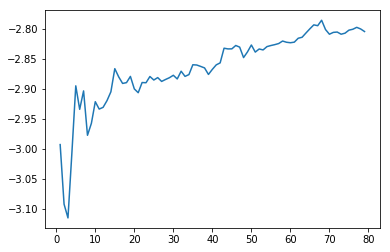

In [46]:
# Из графика видно, что при 70 мы достигаем некого локального максимума, после которого кривая
# корелляции растёт незначительно, при этом скорее всего , когда будут использовано 300 соседей
# для поиска недостающего значения, мы скорее всего переобучим нашу модель. Так что остановимся на 70.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(number_of_neigh, corellation_array, color='tab:blue')

In [47]:
imputer = KNNImputer(n_neighbors=70, missing_values=-1, weights='uniform')
new_dataset = pd.DataFrame(data=imputer.fit_transform(df), columns=df.columns)

# Не заполняем целевую переменную с помощью kNN imputer,
# так как этим мы займемся на этапе обучения модели
new_dataset['score'] = df['score']

In [48]:
new_dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,score,hasnans
0,0.0,0.0,18.0,2.0,0.0,1.0,4.0,4.0,1.0,5.0,...,2.0,0.0,1.0,4.0,3.0,4.0,3.0,6.0,30.0,0.0
1,0.0,0.0,17.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0,...,2.0,2.0,1.0,5.0,3.0,3.0,3.0,4.0,30.0,0.0
2,0.0,0.0,15.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,...,2.0,2.0,0.0,4.0,3.0,2.0,3.0,10.0,50.0,0.0
3,0.0,0.0,15.0,2.0,1.0,2.0,4.0,2.0,2.0,0.0,...,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,75.0,0.0
4,0.0,0.0,16.0,2.0,1.0,2.0,3.0,3.0,3.0,3.0,...,2.0,1.0,1.0,4.0,3.0,2.0,5.0,4.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1.0,0.0,18.0,2.0,1.0,2.0,1.0,1.0,3.0,3.0,...,2.0,0.0,1.0,1.0,1.0,1.0,5.0,0.0,30.0,1.0
387,1.0,1.0,17.0,2.0,2.0,2.0,3.0,1.0,4.0,4.0,...,2.0,2.0,1.0,2.0,4.0,5.0,2.0,3.0,0.0,0.0
388,1.0,1.0,21.0,1.0,1.0,2.0,1.0,1.0,3.0,3.0,...,0.0,1.0,1.0,5.0,5.0,3.0,3.0,3.0,40.0,0.0
389,1.0,1.0,18.0,1.0,2.0,2.0,3.0,2.0,4.0,3.0,...,2.0,2.0,1.0,4.0,4.0,1.0,5.0,0.0,0.0,0.0


Обратим внимание, что переменная studytime,granular имеет корелляцию -1 с переменной studytime,
то есть по сути это две одинаковые переменные с разным знаком.Значит мы можем убрать переменную
studytime,granular без ущерба для качества обучения модели.

In [49]:
new_dataset.corr()['studytime, granular']

school                 0.096481
sex                    0.307347
age                    0.004935
address                0.033234
famsize                0.049096
Pstatus               -0.019630
Medu                  -0.078396
Fedu                  -0.062588
Mjob                  -0.016866
Fjob                   0.075847
reason                -0.140291
guardian               0.002721
traveltime             0.107831
studytime             -1.000000
failures               0.162997
schoolsup             -0.076134
famsup                -0.118916
paid                  -0.217416
activities            -0.110683
nursery               -0.039433
studytime, granular    1.000000
higher                -0.118723
internet              -0.139917
romantic              -0.051399
famrel                -0.031416
freetime               0.118679
goout                  0.046631
health                 0.081826
absences               0.060425
score                 -0.082098
hasnans               -0.037466
Name: st

In [50]:
new_dataset.drop('studytime, granular', axis=1, inplace=True)

Уровень значимости, с которого корелляция с целевой переменной представляет для нас интерес,
неизвестен, и его необходимо определить вручную. Навскидку кажется, что можно задать значение 0.1,
но кажется более разумным использовать метод поиска выбросов, чтобы решить, какие из переменных можно
убрать перед этапом обучения модели.


Отсортируем значения корелляций и нарисуем график, который покажет нам распределение корелляций
Корелляцию переменной с самой собой не берём в рассчёт.

In [51]:
corellations = new_dataset.corr().score.sort_values()[0:-1]

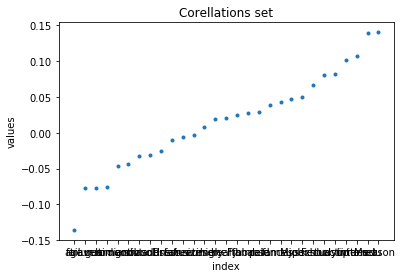

In [52]:
figure, ax = plt.subplots()
ax.set_xlabel('index')
ax.set_ylabel('values')
ax.set_title('Corellations set')
ax.plot(corellations.index, corellations, data=corellations, ls='', marker='.')

Установим порог значимости корелляции в 0.05 и отсеем все незначащие переменные:


In [53]:
for item in corellations:
    if abs(item) < 0.05:
        new_dataset.drop(
            corellations[corellations == item].index, axis=1, inplace=True)

In [54]:
new_dataset

,sex,age,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,activities,internet,score
0,0.0,18.0,4.0,4.0,1.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,30.0
1,0.0,17.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,2.0,30.0
2,0.0,15.0,1.0,1.0,3.0,2.0,1.0,2.0,3.0,2.0,1.0,2.0,50.0
3,0.0,15.0,4.0,2.0,2.0,2.0,1.0,3.0,0.0,1.0,2.0,2.0,75.0
4,0.0,16.0,3.0,3.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.0,18.0,1.0,1.0,1.0,2.0,1.5,2.0,1.0,1.0,2.0,0.0,30.0
387,1.0,17.0,3.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0
388,1.0,21.0,1.0,1.0,1.0,0.0,1.0,1.0,3.0,0.0,1.0,1.0,40.0
389,1.0,18.0,3.0,2.0,1.0,2.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0


In [55]:
new_dataset.corr()

,sex,age,Medu,Fedu,reason,guardian,traveltime,studytime,failures,schoolsup,activities,internet,score
sex,1.000000,-0.051149,0.077712,-0.015774,-0.101095,-0.087510,0.048347,-0.307347,0.028353,-0.128722,0.075680,-0.023006,0.050487
age,-0.051149,1.000000,-0.167000,-0.134713,-0.000141,0.144680,0.093982,-0.004935,0.189214,-0.241421,-0.020672,-0.064883,-0.135641
Medu,0.077712,-0.167000,1.000000,0.273980,0.122124,-0.010124,-0.173092,0.078396,-0.242820,-0.008295,0.091588,0.131750,0.138606
Fedu,-0.015774,-0.134713,0.273980,1.000000,0.083766,-0.108249,0.030403,0.062588,-0.143460,0.005125,0.082610,0.044308,0.066402
reason,-0.101095,-0.000141,0.122124,0.083766,1.000000,0.060580,-0.032691,0.140291,-0.044630,0.026104,0.079798,0.065508,0.140141
guardian,-0.087510,0.144680,-0.010124,-0.108249,0.060580,1.000000,0.009924,-0.002721,0.031503,-0.025214,0.073752,0.079848,-0.075185
traveltime,0.048347,0.093982,-0.173092,0.030403,-0.032691,0.009924,1.000000,-0.107831,0.082529,0.023309,-0.011438,-0.056050,-0.077333
studytime,-0.307347,-0.004935,0.078396,0.062588,0.140291,-0.002721,-0.107831,1.000000,-0.162997,0.076134,0.110683,0.139917,0.082098
failures,0.028353,0.189214,-0.242820,-0.143460,-0.044630,0.031503,0.082529,-0.162997,1.000000,0.004131,-0.067460,-0.032464,-0.077411
schoolsup,-0.128722,-0.241421,-0.008295,0.005125,0.026104,-0.025214,0.023309,0.076134,0.004131,1.000000,-0.011836,-0.001121,0.080529


In [56]:
new_dataset.corr().score.sort_values()

age          -0.135641
failures     -0.077411
traveltime   -0.077333
guardian     -0.075185
sex           0.050487
Fedu          0.066402
schoolsup     0.080529
studytime     0.082098
activities    0.102075
internet      0.107576
Medu          0.138606
reason        0.140141
score         1.000000
Name: score, dtype: float64

В итоговый датасет вошли 12 переменных, которые по нашему предположению статистически значимо 
влияют на переменную score.

Чем больше возраст, количество неудач, время в пути до школы, тем меньше результаты экзамена. Отрицательная корелляция со значнием опекунства может говорить о том, что когда за ребёнком следит кто-то кроме матери и отца, успехи в учёбе склонны к снижению.

Образование отца и матери положительно кореллирует с итоговой успеваемостью. Мужской пол немного лучше женского справляется с итоговыми экзаменами. 

Время, проведённое за учёбой, наличие дополнительных учебных занятий, наличие внеучебной деятельности помогает учащимся получить лучшие оценки за итоговый экзамен.

Наибольшее влияние на итоговые оценки оказывает причина выбора школы. Так, судя по данным, выходит, что выбирая школу с высокой репутацией семья учащегося делает наиболее весомый вклад в успех его будущего итогового экзамена.